In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import uszipcode
from pprint import pprint
import pandas as pd
import numpy as np
from citipy import citipy
from scipy.stats import sem

In [3]:
#Dependencies to merge the csv's
#Import packages
import os
import glob
import csv

In [4]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Files to Load
#File for 2019
csv_2019_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2019.csv")
#File for 2018
csv_2018_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2018.csv")
#File for 2017
csv_2017_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2017.csv")
#File for 2016
csv_2016_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2016.csv")
#File for 2015
csv_2015_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2015.csv")
#File for 2014
csv_2014_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2014.csv")
#File for 2013
csv_2013_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2013.csv")
#File for 2012
csv_2012_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2012.csv")
#File for 2011
csv_2011_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2011.csv")
#File for 2010
csv_2010_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2010.csv")
#File for 2009
csv_2009_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2009.csv")

In [6]:
#Count the number of rows in each file
#csv_2019_df["REPORT_DAT"].count() #27145
#csv_2018_df["REPORT_DAT"].count() #33783
#csv_2017_df["REPORT_DAT"].count() #33116
#csv_2016_df["REPORT_DAT"].count() #37227
#csv_2015_df["REPORT_DAT"].count() #37328
#csv_2014_df["REPORT_DAT"].count() #38438
#csv_2013_df["REPORT_DAT"].count() #35895
#csv_2012_df["REPORT_DAT"].count() #35317
#csv_2011_df["REPORT_DAT"].count() #33292
#csv_2010_df["REPORT_DAT"].count() #31676
#csv_2009_df["REPORT_DAT"].count() #31312

In [7]:
#Use glob to match the pattern ‘csv’
#Match the pattern (‘csv’) and save the list of file names in the ‘all_files’ variable.
#extension = 'csv'
#Use pandas to concatenate all files in the list and export as CSV. 
#The output file is named “dc_crimes.csv” located in your working directory.
#combine all files in the list
path = '../Project1_DC_Crime_Analysis/Resources/'
all_files = glob.glob(path + "/*.csv")
all_files
row = []

for filename in all_files:
   df = pd.read_csv(filename, index_col=None, header=0)
   row.append(df)

dc_crimes = pd.concat(row, axis=0, ignore_index=True)

#Convert to DataFrame
dc_crimes_df=pd.DataFrame(dc_crimes)
dc_crimes_df.count()
dc_crimes_df.head(2)
dc_crimes_df.to_csv("../dc_crimes.csv",index=False,header=True,encoding='utf-8-sig')

In [8]:
#Save the csv of all merged data
dc_crimes_df.to_csv("../dc_crimes_2009_2019.csv",index=False,header=True,encoding='utf-8-sig')

In [9]:
# Loc for CCN - 14148057
#dc_crimes_df.loc[dc_crimes_df["CCN"]==14148057,:]
#dc_crimes_df.columns

In [10]:
#Split the data in START_DATE column to get Date and Time information
dc_crimes_df[['START_DATE','Start_Time']] = dc_crimes_df['START_DATE'].str.split('T',expand=True)
dc_crimes_df[['REPORT_DAT','Report_Time']] = dc_crimes_df['REPORT_DAT'].str.split('T',expand=True)
dc_crimes_df[['END_DATE','End_Time']] = dc_crimes_df['END_DATE'].str.split('T',expand=True)
#pd.to_datetime(dc_crimes_df["START_DATE"])

In [11]:
#Display the data
dc_crimes_df.head(2)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,Start_Time,Report_Time,End_Time
0,-77.039673,38.903151,8005297,2009-01-12,DAY,OTHERS,BURGLARY,1000 - 1099 BLOCK OF CONNECTICUT AVENUE NW,396559.0,137255.0,...,38.903143,-77.039670,GOLDEN TRIANGLE,2008-12-28,NaN,356048194,08005297-01,00:00:00.000Z,10:30:00.000Z,NaN
1,-76.999518,38.904689,162302,2009-11-12,EVENING,OTHERS,MOTOR VEHICLE THEFT,1100 - 1199 BLOCK OF 5TH STREET NE,400042.0,137425.0,...,38.904682,-76.999516,NaN,2009-11-06,2009-11-12,356046669,00162302-01,12:00:00.000Z,18:00:00.000Z,17:00:00.000Z


In [12]:
#Determine Day of the week and Week number
#Use the to_datetime function of Pandas
dc_crimes_df['START_DATE'] = pd.to_datetime(dc_crimes_df['START_DATE'])
dc_crimes_df['Day_of_Week'] = dc_crimes_df['START_DATE'].dt.day_name()
dc_crimes_df['Week_Number'] = dc_crimes_df['START_DATE'].dt.week


#Splitting the Day, Month and Year to new columns
dc_crimes_df['Day'] = dc_crimes_df ['START_DATE'].dt.day
dc_crimes_df['Month'] = dc_crimes_df['START_DATE'].dt.month
dc_crimes_df['Year'] = dc_crimes_df['START_DATE'].dt.year

#The above conversions result in float values - Convert them to integers

dc_crimes_df['Day']=dc_crimes_df['Day'].fillna(0.0).astype(int)
dc_crimes_df['Month']=dc_crimes_df['Month'].fillna(0.0).astype(int)
dc_crimes_df['Year']=dc_crimes_df['Year'].fillna(0.0).astype(int)

#Display the output
dc_crimes_df[["START_DATE","REPORT_DAT","END_DATE","OFFENSE","Day_of_Week","Week_Number","Day","Month","Year"]].head()
#dc_crimes_df.Day.dtype

,START_DATE,REPORT_DAT,END_DATE,OFFENSE,Day_of_Week,Week_Number,Day,Month,Year
0,2008-12-28,2009-01-12,NaN,BURGLARY,Sunday,52.0,28,12,2008
1,2009-11-06,2009-11-12,2009-11-12,MOTOR VEHICLE THEFT,Friday,45.0,6,11,2009
2,2009-12-06,2009-12-06,2009-12-06,THEFT F/AUTO,Sunday,49.0,6,12,2009
3,2002-01-26,2009-10-20,2002-01-26,THEFT/OTHER,Saturday,4.0,26,1,2002
4,2005-04-30,2009-10-20,2005-04-30,ASSAULT W/DANGEROUS WEAPON,Saturday,17.0,30,4,2005


In [13]:
#Counts - Data Profiling
dc_crimes_df.count()
for_me=dc_crimes_df.copy()

In [14]:
# Drop the unnecessary columns
dc_crimes_df.drop(['XBLOCK', 'YBLOCK','Start_Time','Report_Time','End_Time',
                   'X','Y','ANC','BLOCK_GROUP',
                   'CENSUS_TRACT','VOTING_PRECINCT',
                   'BID','OBJECTID','OCTO_RECORD_ID','BID'],axis=1,inplace=True)
dc_crimes_df.count()

CCN                     374403
REPORT_DAT              374403
SHIFT                   374403
METHOD                  374403
OFFENSE                 374403
BLOCK                   374402
WARD                    374392
DISTRICT                374201
PSA                     374173
NEIGHBORHOOD_CLUSTER    369548
LATITUDE                374403
LONGITUDE               374403
START_DATE              374393
END_DATE                352236
Day_of_Week             374393
Week_Number             374393
Day                     374403
Month                   374403
Year                    374403
dtype: int64

In [15]:
#Reorganizing the columns
dc_crimes_df=dc_crimes_df[["CCN","START_DATE","END_DATE","Day_of_Week","Week_Number","Day","Month","Year",
                            "LATITUDE","LONGITUDE","BLOCK","NEIGHBORHOOD_CLUSTER",
                            "METHOD","OFFENSE","PSA",
                            "SHIFT","WARD","DISTRICT",
                            "REPORT_DAT"]]
dc_crimes_df.count()

CCN                     374403
START_DATE              374393
END_DATE                352236
Day_of_Week             374393
Week_Number             374393
Day                     374403
Month                   374403
Year                    374403
LATITUDE                374403
LONGITUDE               374403
BLOCK                   374402
NEIGHBORHOOD_CLUSTER    369548
METHOD                  374403
OFFENSE                 374403
PSA                     374173
SHIFT                   374403
WARD                    374392
DISTRICT                374201
REPORT_DAT              374403
dtype: int64

In [16]:
#Find the columns that have null values in them - Find the count of null values in a column
dc_crimes_df.isna().sum()

CCN                         0
START_DATE                 10
END_DATE                22167
Day_of_Week                10
Week_Number                10
Day                         0
Month                       0
Year                        0
LATITUDE                    0
LONGITUDE                   0
BLOCK                       1
NEIGHBORHOOD_CLUSTER     4855
METHOD                      0
OFFENSE                     0
PSA                       230
SHIFT                       0
WARD                       11
DISTRICT                  202
REPORT_DAT                  0
dtype: int64

In [17]:
#Deleting rows that have null values in them - Retain END_DATE ( to analyze open cases if required)
dc_crimes_df = dc_crimes_df.dropna(axis=0, subset=['START_DATE','NEIGHBORHOOD_CLUSTER','BLOCK',
                                                  'PSA','WARD','DISTRICT'])
dc_crimes_df.isna().sum()

CCN                         0
START_DATE                  0
END_DATE                21879
Day_of_Week                 0
Week_Number                 0
Day                         0
Month                       0
Year                        0
LATITUDE                    0
LONGITUDE                   0
BLOCK                       0
NEIGHBORHOOD_CLUSTER        0
METHOD                      0
OFFENSE                     0
PSA                         0
SHIFT                       0
WARD                        0
DISTRICT                    0
REPORT_DAT                  0
dtype: int64

In [18]:
dc_crimes_df.count()

CCN                     369302
START_DATE              369302
END_DATE                347423
Day_of_Week             369302
Week_Number             369302
Day                     369302
Month                   369302
Year                    369302
LATITUDE                369302
LONGITUDE               369302
BLOCK                   369302
NEIGHBORHOOD_CLUSTER    369302
METHOD                  369302
OFFENSE                 369302
PSA                     369302
SHIFT                   369302
WARD                    369302
DISTRICT                369302
REPORT_DAT              369302
dtype: int64

In [19]:
# # #Any Duplicate incidents?
# dc_crimes_df['Dup_CCN'] = dc_crimes_df.groupby('CCN')['CCN'].transform('size')
# # dc_crimes_df['Dup_CCN']
# # dc_crimes_df_sorted=dc_crimes_df.sort_values("Dup_CCN",ascending=False)
# # dc_crimes_df_sorted['Dup_CCN']
# # dc_crimes_df_sorted.drop_duplicates(subset ="CCN",keep = False, inplace = True)
# # #dc_crimes_df_sorted.drop_duplicates('CCN')
# # dc_crimes_df_sorted['Dup_CCN']
# # #df_export=for_me.loc[dc_crimes_df["CCN"]==13132784,:]
# # #df_export.to_csv("../sample_dup_data.csv",index=False,header=True,encoding='utf-8-sig')

In [20]:
# # There are some incidents that started before 2009 but were reported after 2009
# var=dc_crimes_df.loc[dc_crimes_df["Year"]<2009,"CCN"]
# var.count()
# dc_crimes_df["START_DATE"].count()

In [21]:
#Crimes by Year
#plt.figure(figsize = (8,5))
#dc_crimes_df.groupby([dc_crimes_df.Year]).size().plot.bar()

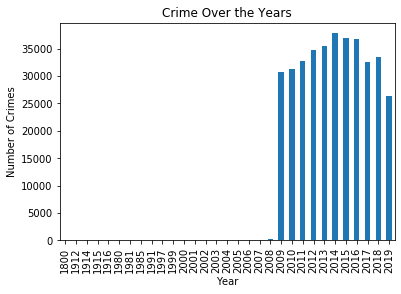

In [22]:
#Plot crimes per year
dc_crimes_df.groupby([dc_crimes_df.Year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

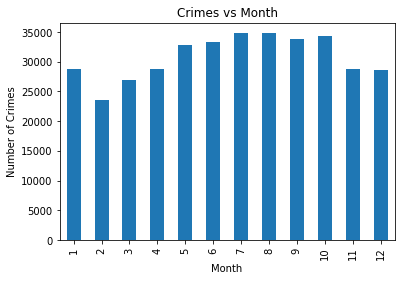

In [23]:
#Plot crimes per month
dc_crimes_df.groupby([dc_crimes_df.Month]).size().plot.bar()
plt.title('Crimes vs Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

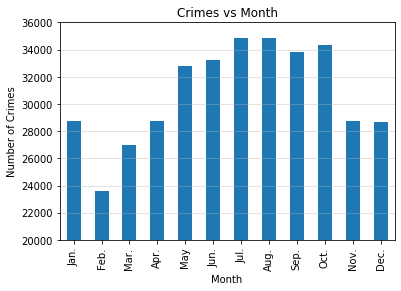

In [58]:
fig, ax = plt.subplots()
dc_crimes_df.groupby([dc_crimes_df.Month]).size().plot.bar()
plt.grid(axis='y', alpha=0.45)
plt.title('Crimes vs Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.ylim(20000, 36000)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.",
            "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."])
plt.show()

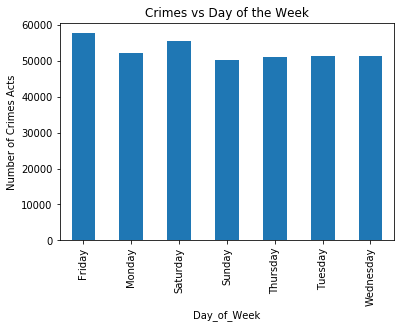

In [24]:
#Plot crimes crimes per day of the week
dc_crimes_df.groupby([dc_crimes_df.Day_of_Week]).size().plot.bar()
plt.title('Crimes vs Day of the Week')
plt.xlabel('Day_of_Week')
plt.ylabel('Number of Crimes Acts')
plt.show()

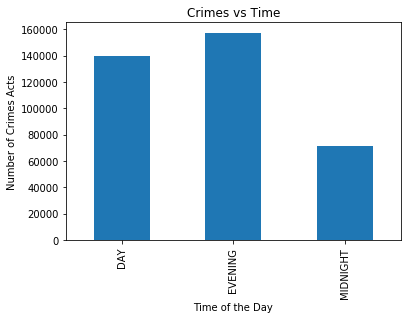

In [25]:
#Plot crimes crimes per Time of the day
dc_crimes_df.groupby([dc_crimes_df.SHIFT]).size().plot.bar()
plt.title('Crimes vs Time')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [26]:
#Distribution of each type of crime
dc_crimes_df.columns
dc_crimes_df["OFFENSE"].unique()
dc_crimes_df["OFFENSE"].value_counts()

THEFT/OTHER                   139401
THEFT F/AUTO                  105733
ROBBERY                        34686
MOTOR VEHICLE THEFT            31839
BURGLARY                       29901
ASSAULT W/DANGEROUS WEAPON     23420
SEX ABUSE                       2691
HOMICIDE                        1357
ARSON                            274
Name: OFFENSE, dtype: int64

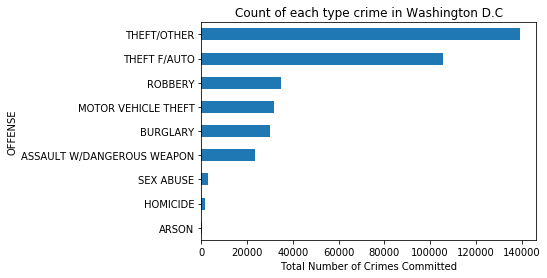

In [27]:
#Offense Plot - Bar Graph
dc_crimes_df.groupby(dc_crimes_df['OFFENSE']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Total Number of Crimes Committed')
plt.title("Count of each type crime in Washington D.C")
plt.show()

# Analysis 
It appears that the most common type of Offense is: Theft 

# Analyzing the trend for different types of Offenses over the years

In [28]:
#THEFT/OTHER                   141605
#THEFT F/AUTO                  106850
#ROBBERY                        35171
#MOTOR VEHICLE THEFT            32388
#BURGLARY                       30229
#ASSAULT W/DANGEROUS WEAPON     23757
#SEX ABUSE                       2750
#HOMICIDE                        1374
#ARSON                            279
#dc_crimes_df.columns

In [29]:
# gather yearly count of "Theft from Vehicle" crime 
#theft = dc_crimes_df[dc_crimes_df["OFFENSE"]=="THEFT/OTHER"]
#theft_yearly= theft["Year"].value_counts(sort=False)
#theft_yearly

In [30]:
#Extract the information for x-axis (i.e years)
#x_axis = theft_yearly.index.tolist()
#x_axis

In [31]:
#plt.plot(x_axis, theft_yearly, label = "Trend for Theft/Other") 

In [32]:
# #Finding Neighbourhoods
# dc_crimes_df.columns
# dc_crimes_df["BLOCK"].unique()

In [33]:
# #Top 10 crime blocks
# dc_crimes_df["BLOCK"].value_counts()[:10].plot.bar(title='Top 10 Dangerous Blocks')

In [34]:
# plt.scatter(dc_crimes_df['LONGITUDE'], dc_crimes_df['LATITUDE'], s=0.5, alpha=0.3, color="brown", lw=0)

In [35]:
#Export the city data into a .csv. -"Should be the final step"
#dc_crimes_df.to_csv("../dc_crimes.csv",index=False,header=True,encoding='utf-8-sig')
#encoding also exports any non-english data

In [36]:
# df1 = dc_crimes_df['BLOCK'].str.extract('(?P<number>\d+)(?P<name>.*)', expand=True)
# print (df1)

In [37]:
copy_df=dc_crimes_df.copy()
copy_df[['BLOCK','Street_Name']] = dc_crimes_df['BLOCK'].str.split('BLOCK OF ',expand=True)
copy_df[['BLOCK','Street_Name']].head(2)
#copy_df.loc[copy_df["Street_Name"]=="None",:]

,BLOCK,Street_Name
0,1000 - 1099,CONNECTICUT AVENUE NW
1,1100 - 1199,5TH STREET NE


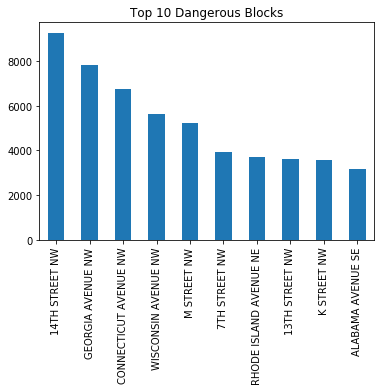

In [38]:
copy_df["Street_Name"].value_counts()[:10].plot.bar(title='Top 10 Dangerous Blocks')